# 선형회귀 실습: Linear Regression

### [나이, 성별, BMI, 자녀, 흡연여부]에 따른 보험료(insurance) 산정값 예측

<선형회귀 장단점>

장점
 - 모델이 간단하기 때문에 구현과 해석이 쉽다
 - 모델링하는 데 오랜 시간이 걸리지 않는다

단점
 - 최신 알고리즘에 비해 예측력이 떨어진다
 - 독립변수와 예측변수의 선형 관계를 전제로 하기 때문에, 이러한 전제에서 벗어나는 데이터에서는 좋은 예측을 보여주기 어렵다

In [1]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

In [2]:
# 보험 데이터셋 읽어오기
data = pd.read_csv("https://raw.githubusercontent.com/agtechresearch/LectureAlgorithm/main/csv/insurance.csv")
data

# sex 는 남성/여성 -> 1은 남성, 0은 여성
# smoker 는 흡연/비흡연 -> 1은 흡연, 0은 비흡연

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [3]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [4]:
# 데이터셋 컬럼 정보 출력


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [5]:
# 통계 정보 출력


,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [6]:
# 통계 정보 소수점 2자릿수까지 반올림
round(data.describe(), 2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


### 데이터셋, 독립변수와 종속변수 분리: 독립변수 -> x, 종속변수 -> y

In [7]:
x = 
y = 

In [8]:
# 독립변수 x 확인
x

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [9]:
# 종속변수 y 확인
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### 학습용 데이터셋(train set)과 검증용(validation set)으로 데이터 분할

학습용 데이터셋(train set) ==> x_train(독립변수), y_train(종속변수)

검증용 데이터셋(validation set) ==> x_val(독립변수), y_val(종속변수)

In [10]:
Image(url='https://raw.githubusercontent.com/agtechresearch/LectureAlgorithm/main/img/W05_datasplit.png', width=700)

In [11]:
Image(url='https://raw.githubusercontent.com/agtechresearch/LectureAlgorithm/main/img/W05_train_test.png', width=700)

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val

### 모델링

In [13]:
from sklearn.linear_model import LinearRegression




LinearRegression()

In [14]:
# 모델을 활용하여 예측하기


In [15]:
# 예측 모델 평가하기
evaluation = pd.DataFrame({'actual': y_val, 'pred': pred})

evaluation

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


<Axes: xlabel='actual', ylabel='pred'>

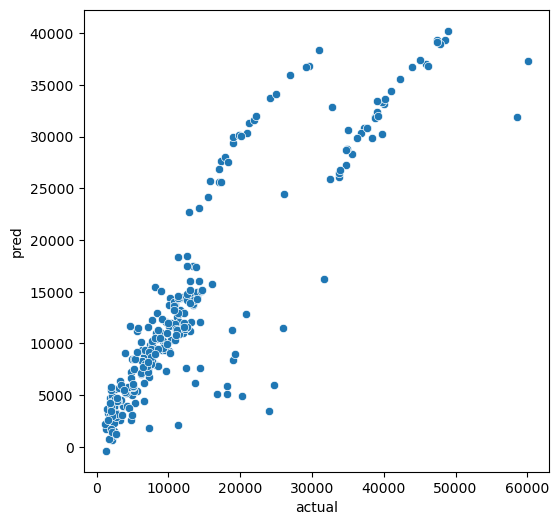

In [16]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(x = 'actual', y = 'pred', data = evaluation) 

In [17]:
from sklearn.metrics import mean_squared_error

# RMSE 값 출력 (** 0.5 는 루트를 의미 --> 0.5 를 제곱으로 계산하겠다는 의미)


5684.927776334486

In [18]:
# 다른방법으로의 RMSE 값 출력 (squared = False 는 루트를 의미)


5684.927776334486

In [19]:
# 결정계수 R^2 값 출력


0.7368220127747351

### 이해하기 : 선형 회귀 (Linear Regression)

In [20]:
model.coef_

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [21]:
Image(url='https://raw.githubusercontent.com/agtechresearch/LectureAlgorithm/main/img/W05_insurance_fx.png', width=700)

In [22]:
pd.Series(model.coef_, index = x.columns)


age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

<위의 내용에 대한 해석> 

- age가 1만큼 증가하면 charges는 약 265만큼 증가
- sex는 0과 1로만 구성된 데이터이기 때문에 ‘1만큼 증가할 때 charges가 17만큼 증가한다기’보다는, ‘남자(1)의 경우 여자(0)보다 charges가 보통 17정도 높다’고 해석가능
- smoker도 sex와 마찬가지로 해석할 수 있습니다.

In [23]:
model.intercept_

-11576.999976112338

### 위의 정보를 이용하여 수식 완성

### charges = 264.799803 * age + 17.344661 * sex + 297.514806 * bmi + 469.339602 * children + 23469.280173 * smoker - 11576.999976112367